## **Author : Rohith Krishna S**

## Title : Iris Flower Classification

**Objective:**
Train a machine learning model that can learn from the measurements of the Iris species dataset and classify them.

In [ ]:
# Import the required packages

import numpy as np # Used for numerical calculations
import matplotlib.pyplot as plt  # Used for visualization
import seaborn as sns   # Used for advanced visualization
import pandas as pd     # Used for loading dataset
%matplotlib inline
import os

In [ ]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels']

# Loading the data using pandas
df = pd.read_csv(r'Iris.csv', names=columns)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [ ]:
# Removing the first row "Id" (Data Cleaning)
df.drop(df.index[0:1], inplace=True)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Some basic statistical analysis about the data
print(df.describe())

       Sepal length Sepal width Petal length Petal width Class_labels
count           151         151          151         151          151
unique           36          24           44          23            4
top             5.0         3.0          1.5         0.2  Iris-setosa
freq             10          26           14          28           50


In [ ]:
# Separate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [ ]:
# Calculate average of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1])
 for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

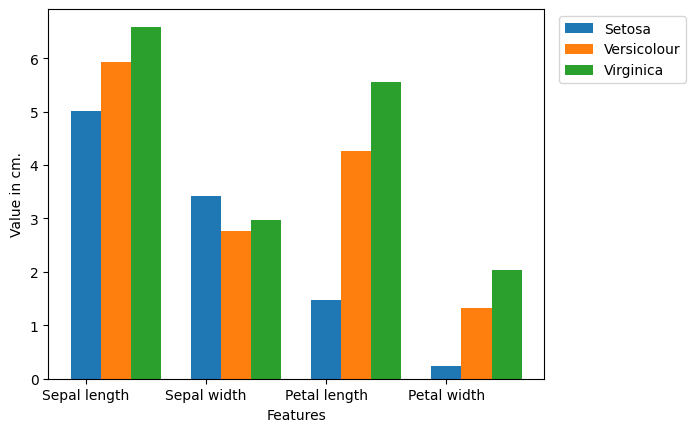

In [ ]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

In [ ]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [ ]:
# Predict from the test dataset
predictions = svn.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9

In [ ]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as iris:
    pickle.dump(svn, iris)

# Load the model
with open('SVM.pickle', 'rb') as iris:
    model = pickle.load(iris)
model.predict(X_new)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)